In [1]:
import tensorflow as tf
# import keras
from tensorflow import keras
import src.py21cnn.utilities as utilities
import numpy as np
import sys
import importlib
import argparse
import itertools
import matplotlib.pyplot as plt
import matplotlib

/media/yqin/81614149-2ed8-4c76-82e1-c46763d086fa/pregi/anaconda3/envs/21CNN_GPU_NEW/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/media/yqin/81614149-2ed8-4c76-82e1-c46763d086fa/pregi/anaconda3/envs/21CNN_GPU_NEW/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/media/yqin/81614149-2ed8-4c76-82e1-c46763d086fa/pregi/anaconda3/envs/21CNN_GPU_NEW/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it

In [13]:
parser = argparse.ArgumentParser(prog = 'Run Model')
parser.add_argument('--dimensionality', type=int, choices=[2, 3], default=3)
parser.add_argument('--removed_average', type=int, choices=[0, 1], default=1)
parser.add_argument('--Zmax', type=int, default=30)
parser.add_argument('--data_location', type=str, default="../data/")
parser.add_argument('--saving_location', type=str, default="/scratch/../../")
parser.add_argument('--model', type=str, default="RNN.SummarySpace3D")
parser.add_argument('--HyperparameterIndex', type=int, choices=range(768), default=0)
parser.add_argument('--epochs', type=int, default=200)
parser.add_argument('--file_prefix', type=str, default="")

_StoreAction(option_strings=['--file_prefix'], dest='file_prefix', nargs=None, const=None, default='', type=<class 'str'>, choices=None, help=None, metavar=None)

In [30]:
inputs = parser.parse_args(['--removed_average', '1'])
inputs.removed_average = bool(inputs.removed_average)
print("INPUTS: ", inputs)
Data = utilities.Data(filepath=inputs.data_location, 
                      dimensionality=inputs.dimensionality, 
                      removed_average=inputs.removed_average, 
                      Zmax=inputs.Zmax)
print(str(Data))
X1 = np.load(f"{Data.filepath}X_test_{0.1:.2f}_{Data.hash()}.npy")
Y1 = np.load(f"{Data.filepath}Y_test_{0.1:.2f}_{Data.hash()}.npy")

INPUTS:  Namespace(HyperparameterIndex=0, Zmax=30, data_location='../data/', dimensionality=3, epochs=200, file_prefix='', model='RNN.SummarySpace3D', removed_average=True, saving_location='/scratch/../../')
dim:3__removed_average:True__normalized:True__Zmax:30__dtype:float32__NaN_removed__boxcar444__clipped_-250_+50__sliced22


In [25]:
EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),(0.833, 'black'),(0.87, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

In [31]:
inputs = parser.parse_args(['--removed_average', '0'])
inputs.removed_average = bool(inputs.removed_average)
print("INPUTS: ", inputs)
Data = utilities.Data(filepath=inputs.data_location, 
                      dimensionality=inputs.dimensionality, 
                      removed_average=inputs.removed_average, 
                      Zmax=inputs.Zmax)
print(str(Data))
X0 = np.load(f"{Data.filepath}X_test_{0.1:.2f}_{Data.hash()}.npy")
Y0 = np.load(f"{Data.filepath}Y_test_{0.1:.2f}_{Data.hash()}.npy")

INPUTS:  Namespace(HyperparameterIndex=0, Zmax=30, data_location='../data/', dimensionality=3, epochs=200, file_prefix='', model='RNN.SummarySpace3D', removed_average=False, saving_location='/scratch/../../')
dim:3__removed_average:False__normalized:True__Zmax:30__dtype:float32__NaN_removed__boxcar444__clipped_-250_+50__sliced22


[-0.5772435  -0.6250858  -0.53534436  2.7011414 ] [-0.5772435  -0.6250858  -0.53534436  2.7011414 ]


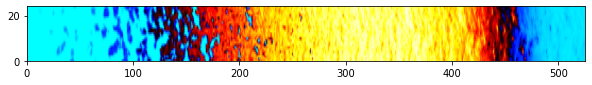

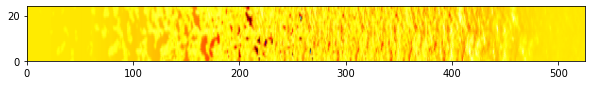

[-0.42824623 -0.6253379  -0.53076327  0.32779995] [-0.42824623 -0.6253379  -0.53076327  0.32779995]


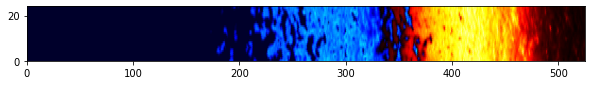

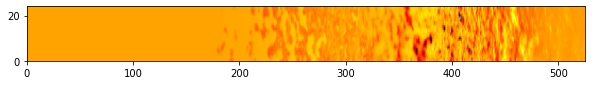

[-0.29694575 -0.623925   -0.5280186   1.1590308 ] [-0.29694575 -0.623925   -0.5280186   1.1590308 ]


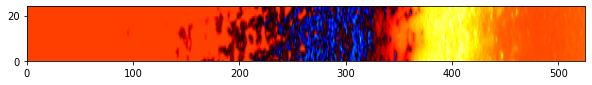

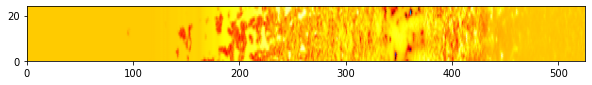

[-0.47039086 -0.6209806  -0.5349595  -0.367751  ] [-0.47039086 -0.6209806  -0.5349595  -0.367751  ]


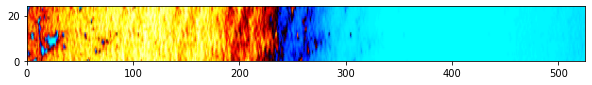

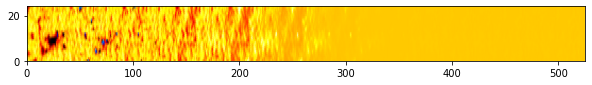

[-0.4588069 -0.6230394 -0.527281   1.4210815] [-0.4588069 -0.6230394 -0.527281   1.4210815]


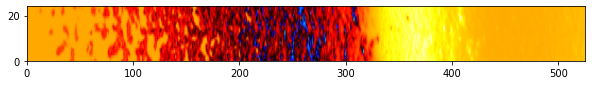

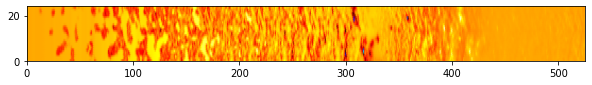

[-0.5278236  -0.6227721  -0.52733654  0.8990221 ] [-0.5278236  -0.6227721  -0.52733654  0.8990221 ]


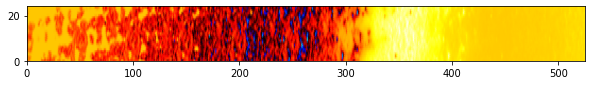

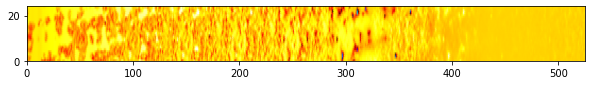

[-0.5725896  -0.62204015 -0.5355585   1.8857859 ] [-0.5725896  -0.62204015 -0.5355585   1.8857859 ]


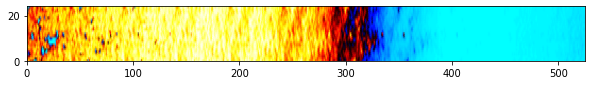

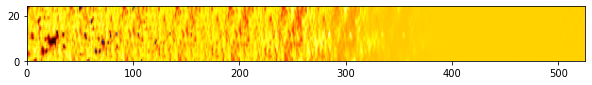

[-0.5087758  -0.62160766 -0.53639925  1.9583064 ] [-0.5087758  -0.62160766 -0.53639925  1.9583064 ]


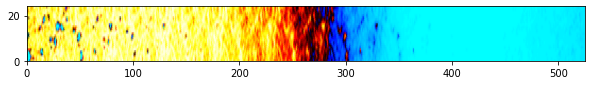

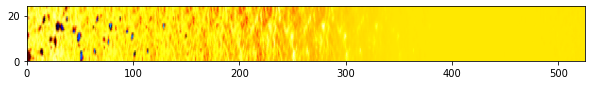

[-0.19172955 -0.6243911  -0.5267127   0.06912583] [-0.19172955 -0.6243911  -0.5267127   0.06912583]


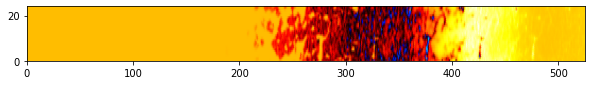

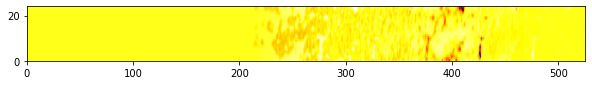

[-0.01582048 -0.6208926  -0.53220195  0.9275819 ] [-0.01582048 -0.6208926  -0.53220195  0.9275819 ]


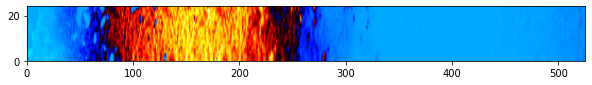

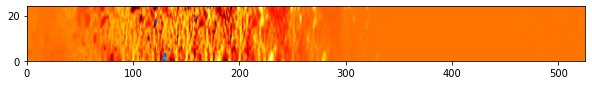

In [32]:
for i in range(10):
    print(Y0[i], Y1[i])
    for j in range(1):
        fig=plt.figure(figsize=(10, 1))
        plt.pcolormesh(X0[i, 0], cmap=EoR_colour,shading='gouraud')
        plt.show()
        fig=plt.figure(figsize=(10, 1))
        plt.pcolormesh(X1[i, 0], cmap=EoR_colour,shading='gouraud')
        plt.show()